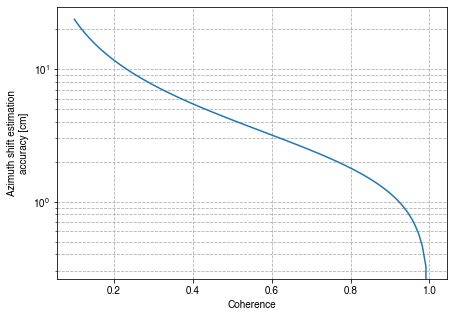

In [1]:
###############################
# play some BOI tricks
###############################

# Reference:
#   1. Yague-Martinez et al., 2019: 10.1109/IGARSS.2019.8900644




import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


def azimuth_shift_accuracy(gamma, N, D_fd, vg):
    """ Eqn. (2), Yague-Martinez et al., 2019
    INPUT
        gamma  : interferometric coherence [-]
        N      : the number of averaged samples [-]
        D_fd   : the spectral separation between both observations at the overlapping areas for a given range [Hz]
        vg     : beam ground velocity [m/s]
    OUTPUT
        sig_Dx : azimuth shift variance [m/s]
    """
    sig_phi = np.sqrt(1 - gamma**2) / gamma / np.sqrt(N)
    sig_Dx = sig_phi * vg / (2 * np.pi * D_fd)
    return sig_Dx


cohs = np.linspace(0.1,1,100)

sig_Dx = 1e2 * azimuth_shift_accuracy(gamma=cohs, N=100, D_fd=4800, vg=7200)


fig, ax = plt.subplots(figsize=[7,5])
plt.plot(cohs, sig_Dx)
plt.yscale('log')
plt.xlabel('Coherence')
plt.ylabel('Azimuth shift estimation\naccuracy [cm]')
plt.grid(True, which="both", ls="--")
plt.show()